# **Step 1: Import the necessary libraries**

In [ ]:
# CodSoft Customer Churn Prediction
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

# **Step 2: Load the CSV file**

In [ ]:
# Load the data
df = pd.read_csv('Churn_Modelling.csv')
df.shape
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **Step 3: Feature Processing**

In [ ]:
# Preprocess the data
X = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = df['Exited']

# Define categorical and numerical features
categorical_features = ['Geography', 'Gender']
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Create transformers for numerical and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
        ])

# **Step 4: Preprocessing Pipelines**

In [ ]:
log_reg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', LogisticRegression(class_weight='balanced'))])

rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=100, class_weight='balanced'))])

gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', GradientBoostingClassifier())])


# **Step 4: Split the data into training and test sets**

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Step 5: Model Training and Evaluation**

In [ ]:
# Train and evaluate models using pipelines
models = [
          ('Logistic Regression', log_reg_pipeline),
          ('Random Forest', rf_pipeline),
          ('Gradient Boosting', gb_pipeline)
         ]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy:", accuracy_score(y_test, y_pred))
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print()

Logistic Regression Accuracy: 0.709
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1607
           1       0.37      0.69      0.48       393

    accuracy                           0.71      2000
   macro avg       0.64      0.70      0.64      2000
weighted avg       0.80      0.71      0.74      2000


Random Forest Accuracy: 0.8545
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1607
           1       0.71      0.44      0.54       393

    accuracy                           0.85      2000
   macro avg       0.79      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000


Gradient Boosting Accuracy: 0.855
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1607
           1 

In [ ]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

y_pred_proba = model.predict_proba(X_test)[:, 1]
print(f"{name} ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))
print(f"{name} Precision:", precision_score(y_test, y_pred))
print(f"{name} Recall:", recall_score(y_test, y_pred))
print(f"{name} F1 Score:", f1_score(y_test, y_pred))


Gradient Boosting ROC-AUC Score: 0.8534560154286827
Gradient Boosting Precision: 0.7136929460580913
Gradient Boosting Recall: 0.43765903307888043
Gradient Boosting F1 Score: 0.5425867507886436


In [ ]:
from sklearn.model_selection import cross_val_score

for name, model in models:
    scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
    print(f"{name} 5-Fold Cross-Validated AUC:", scores.mean())


Logistic Regression 5-Fold Cross-Validated AUC: 0.7547620341861518
Random Forest 5-Fold Cross-Validated AUC: 0.8393326908907601
Gradient Boosting 5-Fold Cross-Validated AUC: 0.8525968965851737


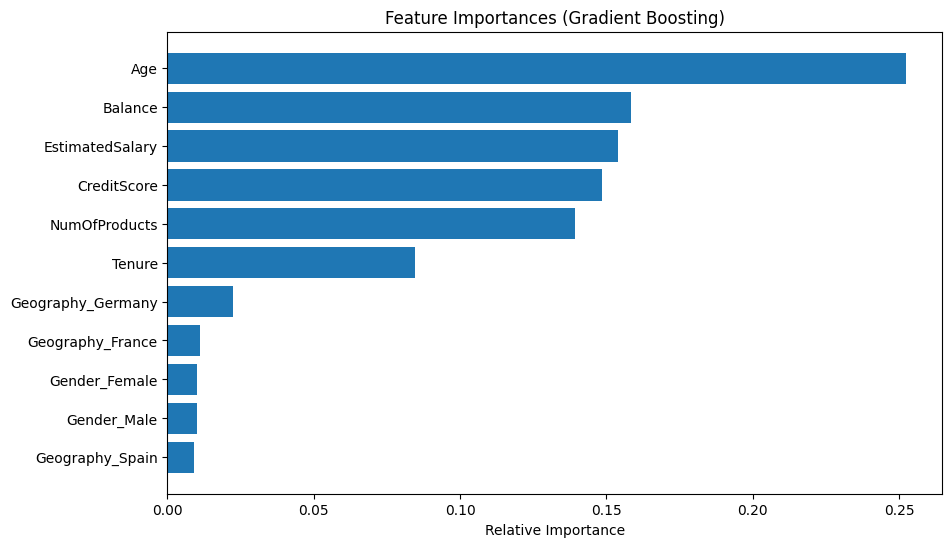

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# For Random Forest or Gradient Boosting
model = rf_pipeline.named_steps['classifier']  # Extract model
feature_names = numerical_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out())
feature_importances = model.feature_importances_

# Plot feature importance
indices = np.argsort(feature_importances)
plt.figure(figsize=(10, 6))
plt.title(f"Feature Importances ({name})")
plt.barh(range(len(indices)), feature_importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
}
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)


Best parameters: {'classifier__max_depth': 10, 'classifier__n_estimators': 100}


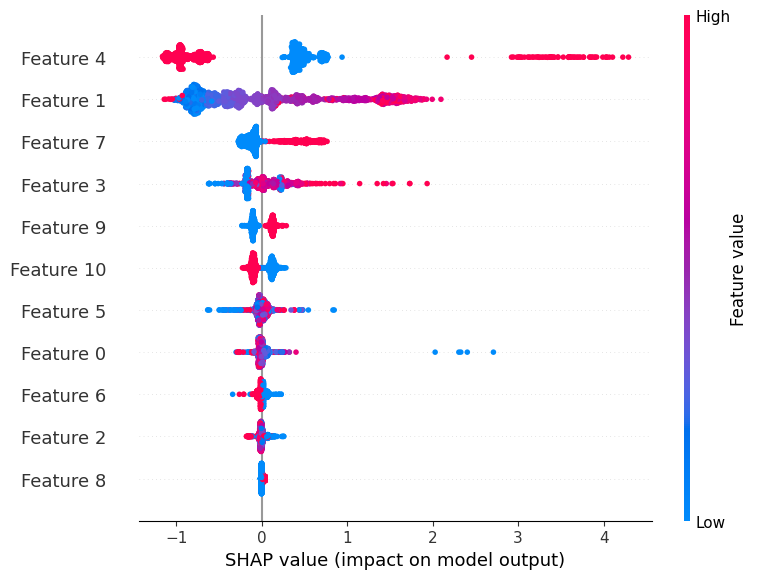

In [ ]:
!pip install shap
import shap

# Ensure X_test is preprocessed
X_test_processed = gb_pipeline.named_steps['preprocessor'].transform(X_test)

# Use SHAP for the Gradient Boosting model
explainer = shap.Explainer(gb_pipeline.named_steps['classifier'])
shap_values = explainer(X_test_processed) # Pass the processed data to the explainer
shap.summary_plot(shap_values, X_test_processed)

Logistic Regression Accuracy: 0.709


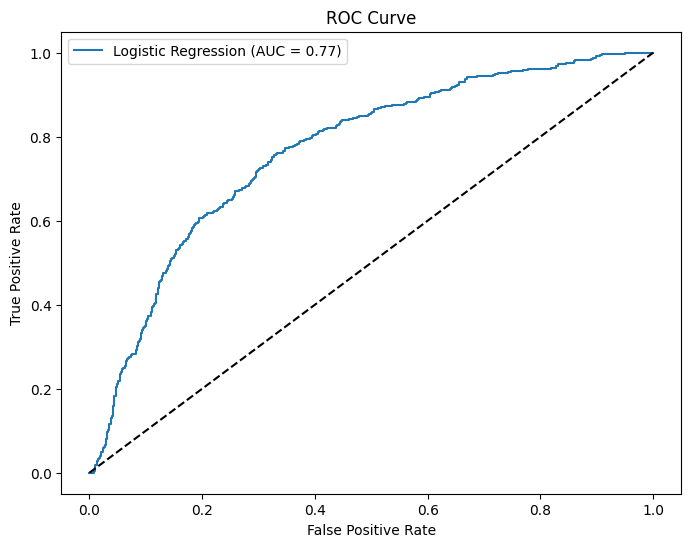

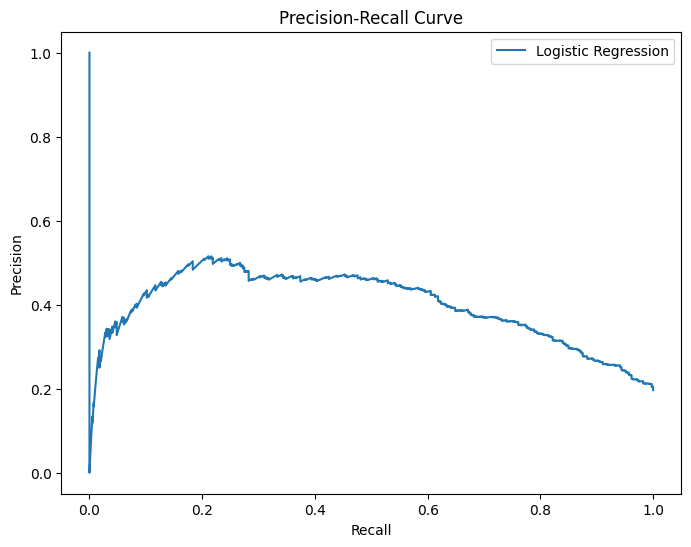

<Figure size 800x600 with 0 Axes>

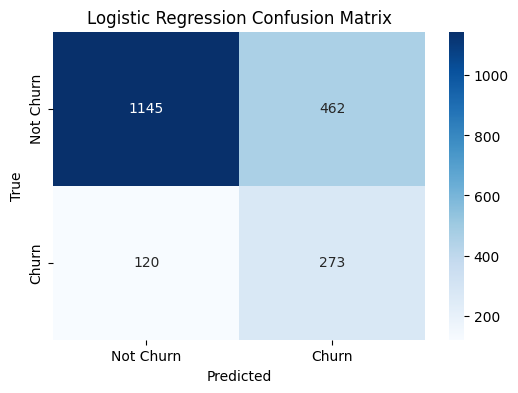

Random Forest Accuracy: 0.857


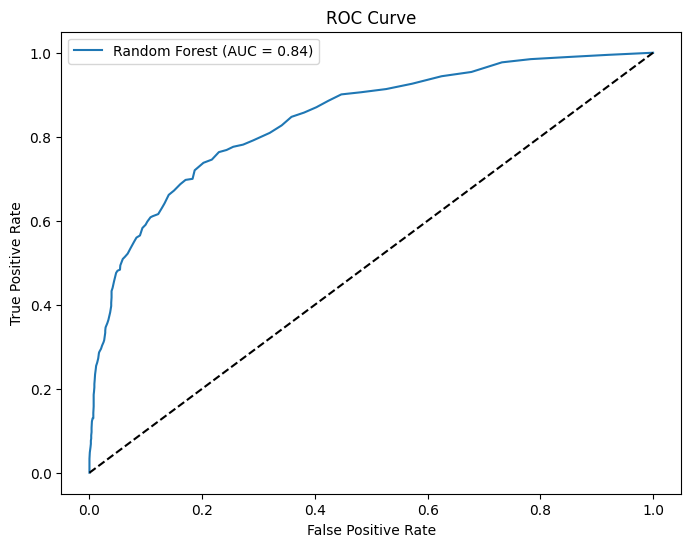

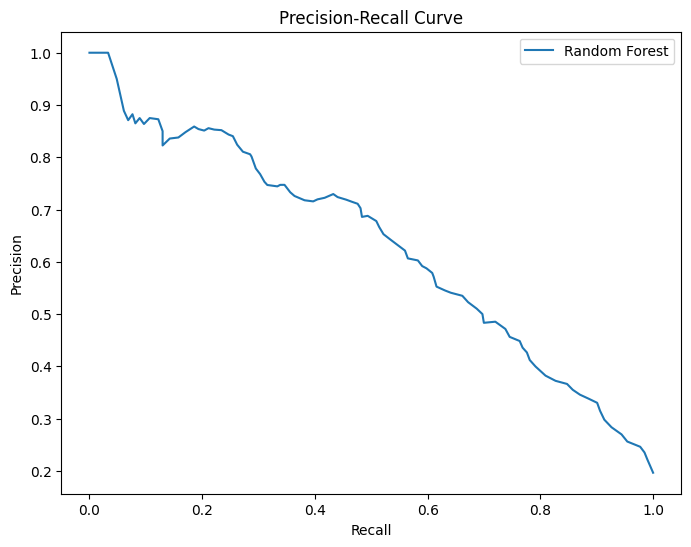

<Figure size 800x600 with 0 Axes>

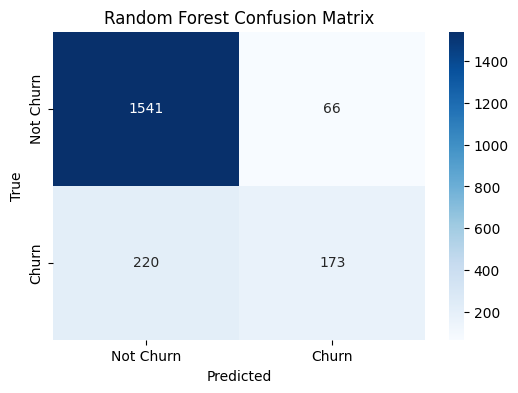

Gradient Boosting Accuracy: 0.8555


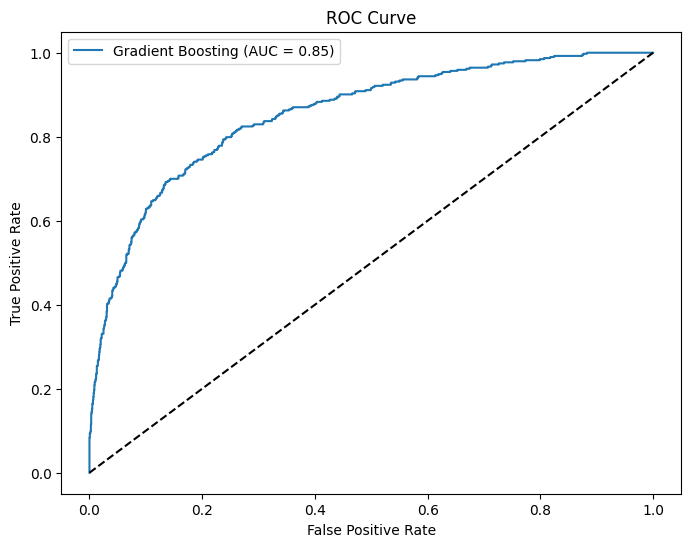

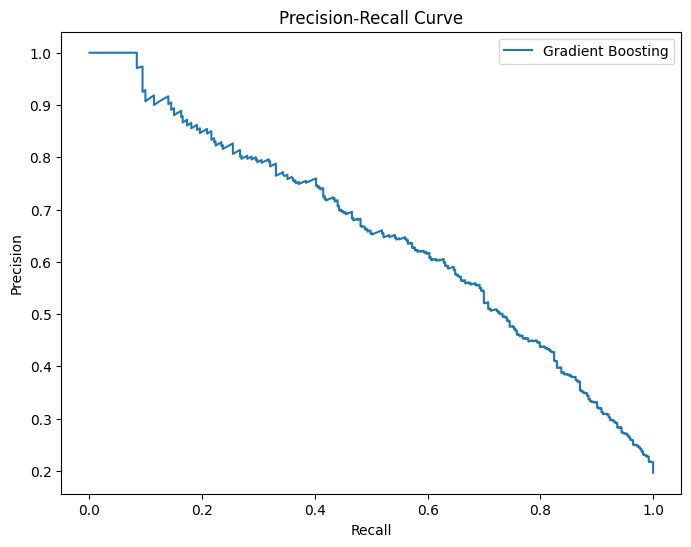

<Figure size 800x600 with 0 Axes>

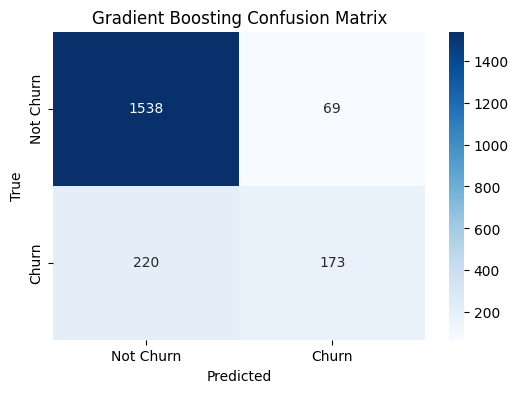

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, confusion_matrix
import seaborn as sns

# Helper function to plot ROC curve
def plot_roc_curve(y_test, y_pred_proba, name):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

# Helper function to plot Precision-Recall curve
def plot_precision_recall_curve(y_test, y_pred_proba, name):
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    plt.plot(recall, precision, label=f"{name}")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()

# Helper function to plot Confusion Matrix
def plot_confusion_matrix(y_test, y_pred, name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('True')

# Train and evaluate models using pipelines and plot graphs
for name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Predict class labels and probabilities
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Print Accuracy
    print(f"{name} Accuracy:", accuracy_score(y_test, y_pred))

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plot_roc_curve(y_test, y_pred_proba, name)
    plt.show()

    # Plot Precision-Recall Curve
    plt.figure(figsize=(8, 6))
    plot_precision_recall_curve(y_test, y_pred_proba, name)
    plt.show()

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    plot_confusion_matrix(y_test, y_pred, name)
    plt.show()
